In [1]:
import numpy as np
import matplotlib.pyplot as plt

Vi genererar slumpmässig datapunkter uniformt på $[0,1]^2$

In [2]:
np.random.seed(133)
N = 100 #number of data points
x = np.random.uniform(0,1, size = (2,N))

Sedan deffinerar vi en cirkel och klassifierar punkter innanför och utanför cirkeln.

Cirkeln exvation ges av $(x_1-c_1)^2 + (x_2 - c_2)^2= r^2$ så punkterna får label 1 om 
$$(x_1-c_1)^2 + (x_2 - c_2)^2 > r^2 $$

In [3]:
#n,c are the parameters fo for the hyperplane separating the two sets n*x=c
c_1 = 0.5
c_2 = 0.5
r = 0.4
y = np.zeros((N,)) #labels
for i in range(N):
    if ((x[0,i]-c_1)**2 + (x[1,i]-c_2)**2>r**2):
        y[i] = 1

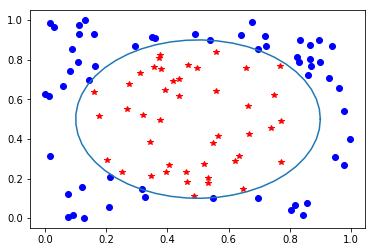

In [4]:
plt.plot(x[0,y==0],x[1,y==0],'r*') #plots all points with albels 0
plt.plot(x[0,y==1],x[1,y==1],'bo') #plots all points with labels 1 #plots the separating hyperplane
theta = np.linspace(0,2*np.math.pi)
x_c = c_1+ r*np.cos(theta)
y_c = c_2 + r*np.sin(theta)
plt.plot(x_c,y_c) #plot the circle

Punkterna ska nu klassifieras med ett neuralt nätverk med ett gömt lager. Input är två dimensionell och multipliceras med en $n_1\times 2$ dimensionell matris $W_1$, adderas med en $n_1$ dimensionell vektor $b_1$ och körs genom en icke-linjär aktiverings funktion $\sigma_1$. Det ger värdena i det gömda lagret $h_1$.
$$h_1 = \sigma_1(W_1x+b)$$
Denna output multipliceras sedan med en $1\times n_1$ dimensionell vektor $W_2$, adderas med skalären $b_2$ och körs genom en logistisk funktion $\sigma_2$
$$f = \sigma_2(W_2h_1 + b_2)$$

Nedan är ett exempel på ett lätt neuralt nätverk med tanh som aktiveringsfunktion i hidden layer. Notera att den returnerar mer än bara funktionsvärdet f. De andra värdena kan vara bra att ha när man beräknar gradienten. 

In [5]:
def f_nn(W_1,W_2, b_1,b_2,x,batch_size):
    a_1 = np.matmul(W_1,x.reshape((2,batch_size))) + b_1 #Gör beräkningen W_1x + b. Reshapar så att dimensionerna i matrismultiplikationerna blir rätt
    h_1 = np.tanh(a_1) #räknar ut värdena i hidden layer genom att ta akteveringsfunktionen på tidigare uträknat.
    a_2 = np.matmul(W_2,h_1) + b_2 #Räknar ut W_2h_1 + b_2
    f = 1/(1+np.exp(-a_2))  #räknar ut outputen, som är en sigmoid funktion.
    return (f,a_1,h_1,a_2) #Kan vara bra att returnera mer än bara funktionsvärdet för att underlätta uträckningarna i backpropagation

Vi initierar vikterna slumpvis, tar bredden 4 i hidden layer.

In [6]:
n_1 = 4
W_1 = np.random.normal(size= (n_1,2))
W_2 = np.random.normal(size = (1,n_1))
b_1 = np.random.normal(size= (n_1,1))
b_2 = np.random.normal(size = (1,1))

Nu är det bara att träna vikterna i NN med gradient descent. Klarar den inte av att klassifiera punkterna så testa att göra bredden i det gömda lagret större